In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_excel("Date_Fruit_Dataset.xlsx")

In [ ]:
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [ ]:
print(data.shape)
print(data['Class'].unique())

(898, 35)
['BERHI' 'DEGLET' 'DOKOL' 'IRAQI' 'ROTANA' 'SAFAVI' 'SOGAY']


In [ ]:
# Creating the features dataset.
X = data.drop('Class', axis=1) 

# Creating the labels dataset.
y = data.loc[:, 'Class']

In [ ]:
# Normalizing the features dataset.
X_scaled = minmax_scale(X)

# Creating a DataFrame using the new variable.
X = pd.DataFrame(X_scaled)

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.772274,0.772079,0.565604,0.841941,0.446429,0.871512,0.983209,0.767108,0.787438,0.000435,...,0.395739,0.062495,0.053715,0.080752,0.458253,0.455197,0.546327,0.673513,0.550537,0.494665
1,0.617835,0.617480,0.436904,0.775906,0.342186,0.773229,1.000000,0.611906,0.776970,0.000282,...,0.350002,0.037387,0.040885,0.046033,0.687312,0.599151,0.643352,0.538923,0.516341,0.494501
2,0.964674,0.913374,0.681733,0.933143,0.464896,0.981104,0.992537,0.956896,0.736842,0.000467,...,0.472509,0.083531,0.089677,0.096843,0.139263,0.194220,0.312066,0.777967,0.619782,0.573507
3,0.761063,0.757502,0.554467,0.841456,0.430098,0.864727,0.983831,0.755891,0.766502,0.000408,...,0.687121,0.136202,0.278800,0.213061,0.707125,0.657830,0.665214,0.436260,0.377376,0.366683
4,0.635159,0.657060,0.482240,0.759716,0.460470,0.784821,0.958955,0.633316,0.711253,0.000459,...,0.464794,0.040608,0.054459,0.086850,0.634560,0.615256,0.710963,0.581443,0.485820,0.395128


In [ ]:
y

0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object

In [ ]:
""" We should create an LabelEncoder object because AI algorithms can
not use string data when training a model. """

Encoder = LabelEncoder()

y = Encoder.fit_transform(y)


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
# Splitting train, test and validate parts.

X_train, X_temporary, y_train, y_temporary = train_test_split(X, y, train_size=0.8)

X_test, X_val, y_test, y_val = train_test_split(X_temporary, y_temporary, test_size=0.5)

In [ ]:
# Printing the lengths for checking.
print(len(X))
print(len(y))
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

898
898
718
718
90
90
90
90


In [ ]:
# Creating a model object
model = tf.keras.Sequential()

In [ ]:
# Creating an input layer.
input_layer = tf.keras.layers.Dense(4096,
                                    input_shape=(34,),
                                    activation='relu')

# Adding input layer to model object.
model.add(input_layer)

In [ ]:
# Adding 4 hidden layers to model, and adding dropout to prevent overfitting. 
model.add(tf.keras.layers.Dense(4096,
                                activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(4096,
                                activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(4096,
                                activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(4096,
                                activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))


In [ ]:
# Adding the output layer.
model.add(tf.keras.layers.Dense(7,
                                activation='softmax'))


In [ ]:
# Compiling the model.
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# Training the model for 100 epochs.
results = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
23/23 [==============================] - 3s 33ms/step - loss: 1.9022 - accuracy: 0.3412 - val_loss: 1.1972 - val_accuracy: 0.6000
Epoch 2/100
23/23 [==============================] - 0s 19ms/step - loss: 0.8724 - accuracy: 0.6518 - val_loss: 0.7852 - val_accuracy: 0.7556
Epoch 3/100
23/23 [==============================] - 0s 18ms/step - loss: 0.6739 - accuracy: 0.7340 - val_loss: 0.5754 - val_accuracy: 0.8000
Epoch 4/100
23/23 [==============================] - 0s 18ms/step - loss: 0.6060 - accuracy: 0.7465 - val_loss: 0.4953 - val_accuracy: 0.8000
Epoch 5/100
23/23 [==============================] - 0s 18ms/step - loss: 0.5166 - accuracy: 0.7688 - val_loss: 0.5436 - val_accuracy: 0.7556
Epoch 6/100
23/23 [==============================] - 0s 19ms/step - loss: 0.5976 - accuracy: 0.7646 - val_loss: 0.5398 - val_accuracy: 0.7889
Epoch 7/100
23/23 [==============================] - 0s 17ms/step - loss: 0.4966 - accuracy: 0.8092 - val_loss: 0.4063 - val_accuracy: 0.8222
Epoch 

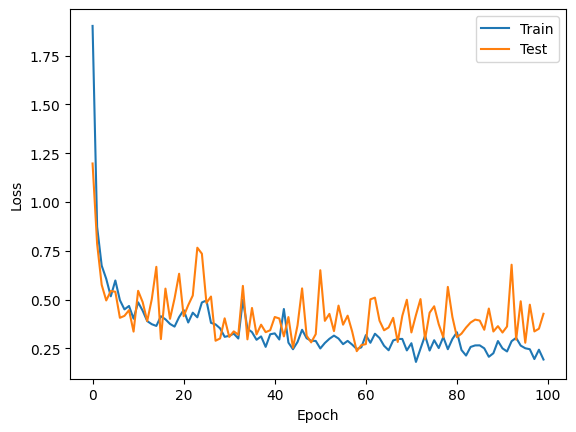

In [ ]:
# Visualizing the results.
plt.plot(results.history['loss'], label='Train')
plt.plot(results.history['val_loss'], label='Test')

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()

plt.show()

In [ ]:
# Evaluating the performance.
test_result = model.test_on_batch(X_test, y_test)

print(test_result)

[0.3616470396518707, 0.9333333373069763]
